In [1]:
import pandas as pd
import numpy as np
import seaborn 
from sklearn.ensemble import RandomForestClassifier

train_data = "train.csv"
data = pd.read_csv(train_data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
test_csv = "test.csv"
test_data = pd.read_csv(test_csv)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df = pd.concat([data, test_data], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,True,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,False,True,False,False,False,True,False,False,False,False,True,False


In [6]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data[["Sex", "Survived"]].groupby(['Sex']).mean()*100 

,Survived
Sex,
female,74.203822
male,18.890815


In [11]:
data[["Sex"]].value_counts()

Sex   
male      577
female    314
Name: count, dtype: int64

In [12]:
data[["Sex", "Age"]].groupby(['Sex']).value_counts()

Sex     Age  
female  24.00    16
        18.00    13
        22.00    12
        30.00    11
        35.00     8
                 ..
male    6.00      1
        0.92      1
        0.67      1
        0.42      1
        80.00     1
Name: count, Length: 145, dtype: int64

In [13]:
class_surv_data = data[["Pclass", "Survived"]].groupby(['Pclass']).mean()*100
class_surv_data.head()

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


/home/nazlican/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


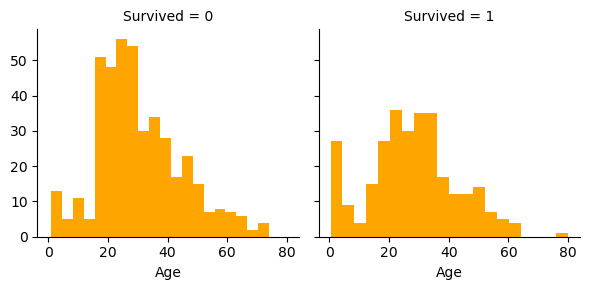

In [14]:
graph = seaborn.FacetGrid(data, col ='Survived') 
graph.map(plt.hist, 'Age', bins = 20, color ='orange') 
plt.show() 

/home/nazlican/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


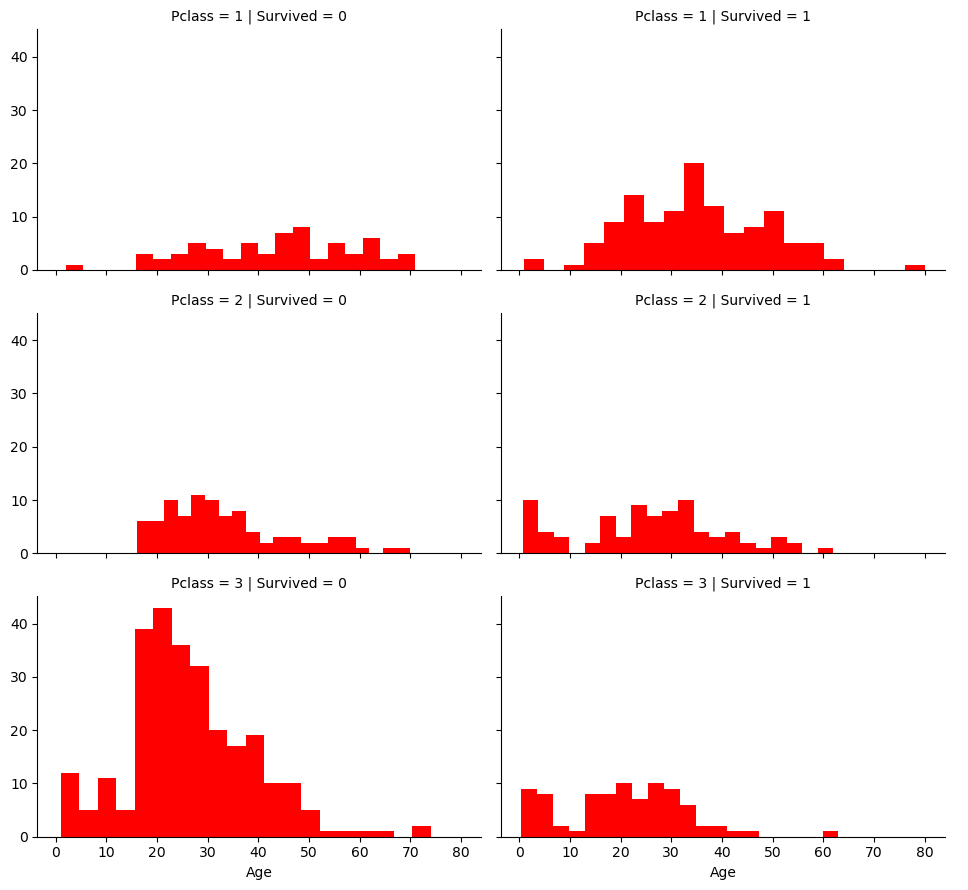

In [15]:
grid = seaborn.FacetGrid(data, col='Survived', row='Pclass',aspect=1.6)
grid.map(plt.hist, 'Age', bins=20, color="red")
grid.add_legend();

In [16]:
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df['Cabin'].fillna('unknown', inplace=True)

In [40]:
if df['Cabin'].isnull().any() == True:
    print('null')

In [45]:
if df.columns.isnull().any() == True:
    print('null')

In [20]:
mean_value = df['Cabin'].mean()
df['Cabin'].fillna(mean_value, inplace=True) 

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [52]:
tf = pd.DataFrame(test_data)
df.dropna(inplace=True)
tf.dropna(inplace=True)
properties = ["Pclass", "Age", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[properties])
y = df["Survived"]

X_test = pd.get_dummies(tf[properties])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

predictions = model.predict(X_test)
print('predictions:', predictions)
output = pd.DataFrame({'PassengerId': tf.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

predictions: [1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 1]


In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
if df.columns.isnull().any() == True:
    print('null')